# Proyecto Final - Sprint 17 - Tripleten

## ¿En qué consiste el proyecto?

## Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes.  
Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales.  
El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, _línea de abonado digital_) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (_ProtecciónDeDispositivo_) y un bloqueador de sitios web maliciosos (_SeguridadEnLínea_).
- Una línea de soporte técnico (_SoporteTécnico_).
- Almacenamiento de archivos en la nube y backup de datos (_BackupOnline_).
- Streaming de TV (_StreamingTV_) y directorio de películas (_StreamingPelículas_).

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente.  
La información del contrato es válida a partir del 1 de febrero de 2020.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  accuracy_score  
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
contract = pd.read_csv('final_provider/contract.csv')
internet = pd.read_csv('final_provider/internet.csv')
personal = pd.read_csv('final_provider/personal.csv')
phone = pd.read_csv('final_provider/phone.csv')

In [3]:
contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [4]:
internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>En el dataset que me proporcionaron en el notion de Tripleten, si me aparecen las columnas que utilizo durante el desarrollo del proyecto customerID	InternetService	OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies</b> <a class=“tocSkip”></a>
</div>

In [5]:
personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [6]:
phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


## **Fase 1: Revisión Inicial y Preparación de Datos**

### **1.1. Revisión de los Datos**

#### Contract

In [7]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [8]:
contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [9]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [10]:
categorical_cols = contract.select_dtypes(include=['object']).columns
print(contract[categorical_cols].nunique())

customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
dtype: int64


#### Internet

In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [12]:
internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [13]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [14]:
categorical_cols = internet.select_dtypes(include=['object']).columns
print(internet[categorical_cols].nunique())

customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64


#### Personal

In [15]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [16]:
personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [17]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
categorical_cols = personal.select_dtypes(include=['object']).columns
print(personal[categorical_cols].nunique())

customerID    7043
gender           2
Partner          2
Dependents       2
dtype: int64


#### Phone

In [19]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [20]:
phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

In [21]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


In [22]:
categorical_cols = phone.select_dtypes(include=['object']).columns
print(phone[categorical_cols].nunique())

customerID       6361
MultipleLines       2
dtype: int64


Dentro de los datasets, no es necesario realizar alguna limpieza o transformación

## Visualización de Datos

### Distribución de tipos de contratos para el dataset "contract"

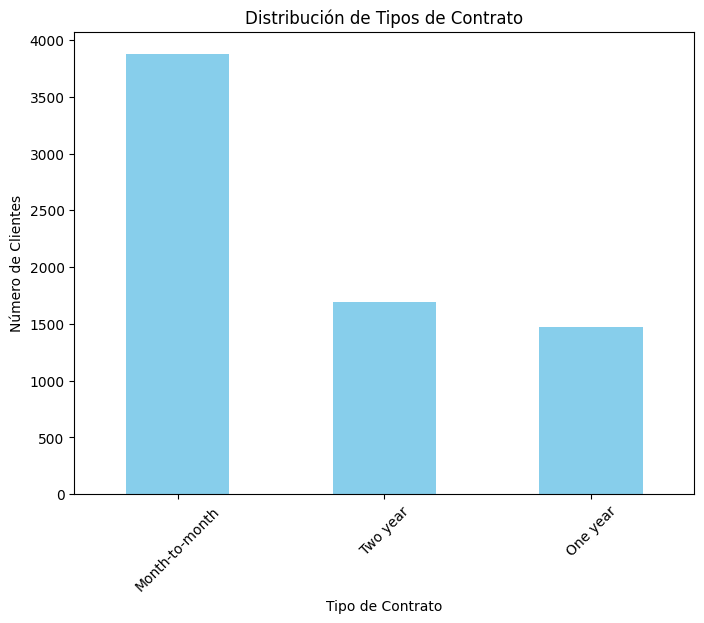

In [23]:
plt.figure(figsize=(8, 6))
contract['Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()


### Proporción de clientes con facturación eléctronica

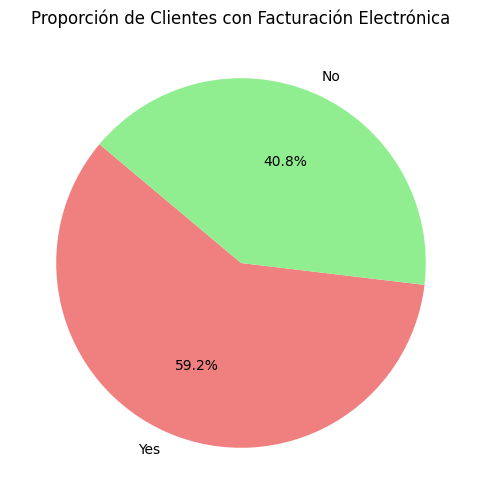

In [24]:
plt.figure(figsize=(8, 6))
contract['PaperlessBilling'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightgreen'])
plt.title('Proporción de Clientes con Facturación Electrónica')
plt.ylabel('')  
plt.show()



### Distribución de métodos de Pago en el dataset


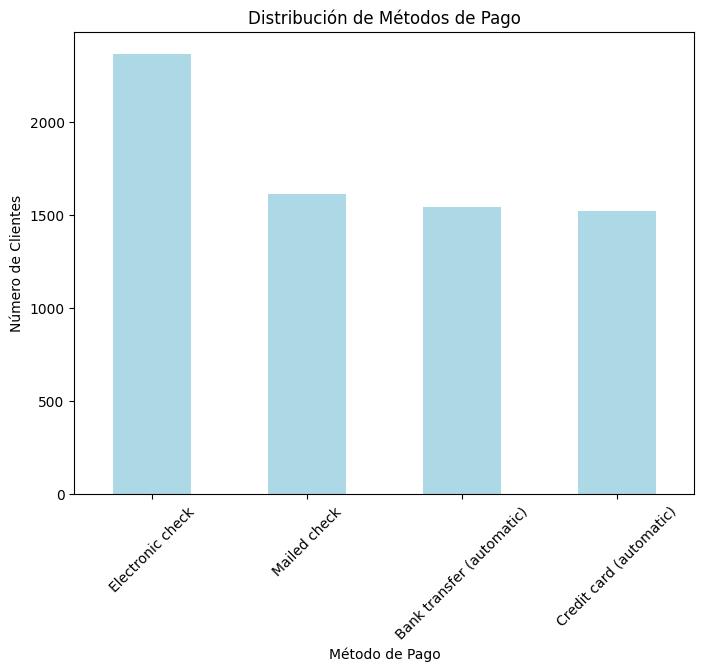

In [25]:
plt.figure(figsize=(8, 6))
contract['PaymentMethod'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribución de Métodos de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()



### Proporción de Clientes con Servicio de Seguridad en Línea

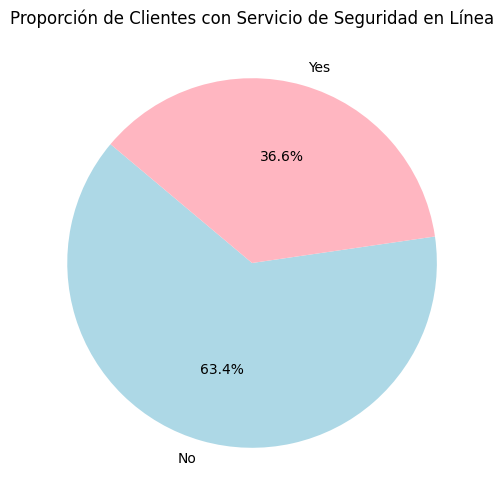

In [26]:
plt.figure(figsize=(8, 6))
internet['OnlineSecurity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Proporción de Clientes con Servicio de Seguridad en Línea')
plt.ylabel('')
plt.show()



### Distribución de Géneros 

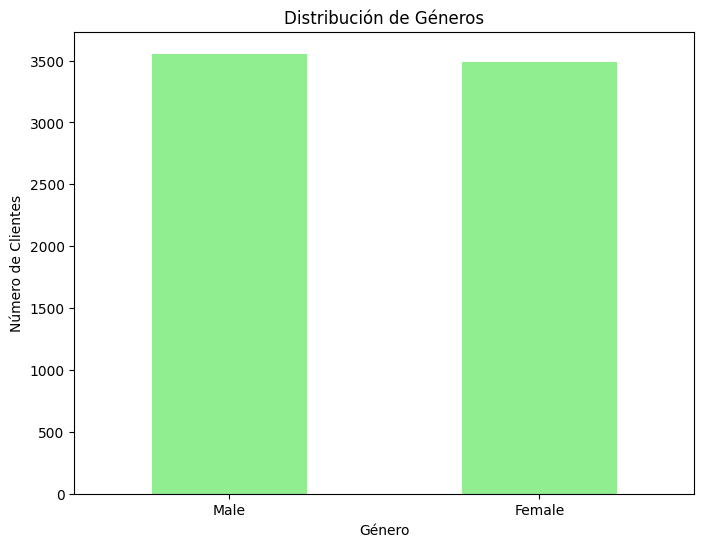

In [27]:
plt.figure(figsize=(8, 6))
personal['gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()



### Proporción de Clientes con Múltiples Líneas Telefónicas 

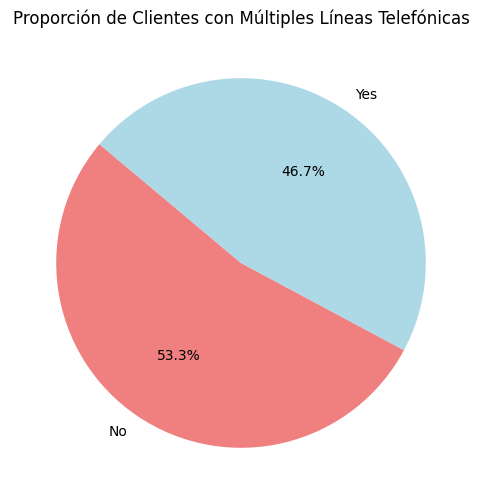

In [28]:
plt.figure(figsize=(8, 6))
phone['MultipleLines'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Proporción de Clientes con Múltiples Líneas Telefónicas')
plt.ylabel('')
plt.show()



## Conclusiones de las Gráficas

### 1. Distribución de Tipos de Contrato
La mayoría de los clientes tienen contratos de tipo "Month-to-month" (mensuales). Esto puede indicar que los clientes prefieren la flexibilidad de poder cancelar o modificar su contrato sin estar atados a un compromiso a largo plazo. 

### 2. Proporción de Clientes con Facturación Electrónica
Una mayoría significativa de los clientes opta por la facturación electrónica. Esto puede ser un reflejo de la tendencia hacia la digitalización y la conveniencia de recibir facturas electrónicas en lugar de facturas impresas aparte de generar menos contaminación al evitar el uso de papel.

### 3. Distribución de Métodos de Pago
El método de pago más común es "Electronic check", seguido por "Mailed check" y otros métodos automáticos como "Bank transfer" y "Credit card (automatic)". Esto sugiere que los clientes prefieren los métodos de pago electrónicos, aunque un número considerable sigue utilizando cheques enviados por correo.

### 4. Proporción de Clientes con Servicio de Seguridad en Línea
Una parte significativa de los clientes no cuenta con el servicio de seguridad en línea. Esto podría ser una oportunidad para la empresa de promover este servicio como un valor agregado, especialmente en un entorno donde la seguridad en línea es cada vez más importante.

### 5. Distribución de Géneros
La distribución de género entre los clientes está bastante equilibrada.

### 6. Proporción de Clientes con Múltiples Líneas Telefónicas
La mayoría de los clientes no tienen múltiples líneas telefónicas.


## Validación para el modelo

#### El objetivo del proyecto nos plantea la creación de un modelo que nos permita predecir la cancelación del servicio por parte los clientes, este tipo de problemas son de clasificación binaria.

Primero, se deberá crear un solo dataframe donde combinaremos los 4 datasets proporcionados, esto para que posteriormente podamos trabajar en un modelo de entrenamiento y uno de prueba.

In [29]:
df = pd.merge(contract, internet, on='customerID', how='left')
df = pd.merge(df, personal, on='customerID', how='left')
df = pd.merge(df, phone, on='customerID', how='left')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

df.head()



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,5375,75,4,0,1,2,29.85,2505,0,0,1,0,0,0,0,0,0,1,0,2
1,3962,42,4,1,0,3,56.95,1466,0,1,0,1,0,0,0,1,0,0,0,0
2,2564,72,2,0,1,3,53.85,157,0,1,1,0,0,0,0,1,0,0,0,0
3,5535,31,4,1,0,0,42.30,1400,0,1,0,1,1,0,0,1,0,0,0,2
4,6511,71,1,0,1,2,70.70,925,1,0,0,0,0,0,0,0,0,0,0,0


### Modelo de entrenamiento y prueba

In [31]:
# Crear la columna 'Churn'
# Si 'EndDate' tiene un valor, se considera que el cliente ha cancelado el servicio (Churn = 1)
df['Churn'] = df['EndDate'].apply(lambda x: 1 if x != 0 else 0)

# Eliminar columnas innecesarias para el modelo como 'customerID' y 'EndDate'
X = df.drop(columns=['Churn', 'customerID', 'EndDate'])
y = df['Churn']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Regresion Logistica

In [32]:
# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir con el modelo de regresión logística
y_pred = model.predict(X_test)

# Calcular métricas para la Regresión Logística
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Mostrar las métricas
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Logistic Regression Model Performance:
Accuracy: 0.9271
Precision: 0.9271
Recall: 1.0000
ROC AUC: 0.7326


c:\Users\ders_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Arbol de Decision

In [33]:
# Entrenar un árbol de decisión
tree_model = DecisionTreeClassifier(random_state=1234)
tree_model.fit(X_train, y_train)

# Predecir con el árbol de decisión
y_pred_tree = tree_model.predict(X_test)

# Calcular métricas para el Árbol de Decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

# Mostrar las métricas
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"ROC AUC: {roc_auc_tree:.4f}")



Decision Tree Model Performance:
Accuracy: 0.9210
Precision: 0.9534
Recall: 0.9617
ROC AUC: 0.6822


## Random Forest

In [34]:
# Entrenar un bosque aleatorio
rf_model = RandomForestClassifier(random_state=1234, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predecir con el bosque aleatorio
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas para el Bosque Aleatorio
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Mostrar las métricas
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")


Random Forest Model Performance:
Accuracy: 0.9371
Precision: 0.9373
Recall: 0.9990
ROC AUC: 0.8510


### Evaluación de metricas 

In [35]:
metrics_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy, accuracy_tree, accuracy_rf],
    'Precision': [precision, precision_tree, precision_rf],
    'Recall': [recall, recall_tree, recall_rf],
    'ROC AUC': [roc_auc, roc_auc_tree, roc_auc_rf]
})

# Mostrar las métricas
print(metrics_comparison)

                 Model  Accuracy  Precision    Recall   ROC AUC
0  Logistic Regression  0.927118   0.927118  1.000000  0.732626
1        Decision Tree  0.920965   0.953441  0.961715  0.682156
2        Random Forest  0.937056   0.937261  0.998979  0.850974


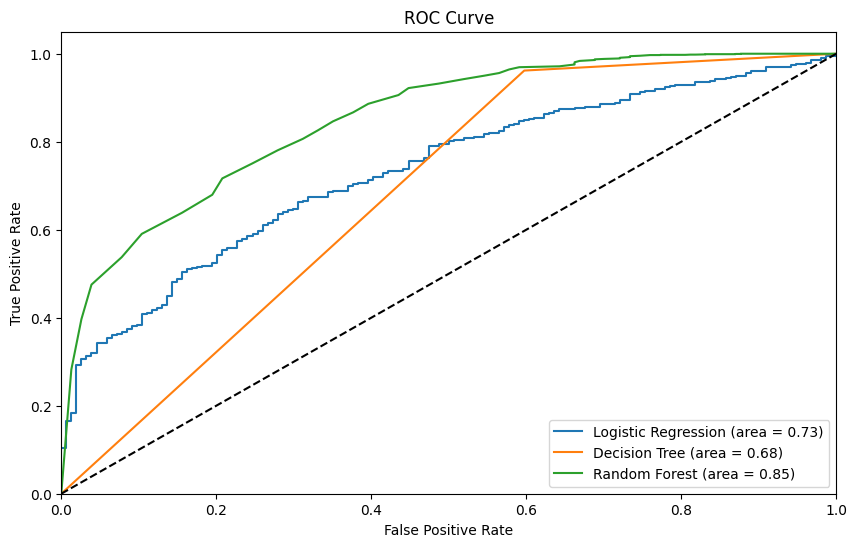

In [36]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot(fpr_tree, tpr_tree, label='Decision Tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Interpretación de la Curva ROC

## 1. Comparación de Modelos
- **Random Forest (área = 0.85)**: La curva ROC del Random Forest es la más alta y está más cerca de la esquina superior izquierda. Esto nos puede decir que el modelo tiene la mejor capacidad para distinguir entre las clases positivas y negativas. El AUC de 0.85 indica que el modelo tiene un buen rendimiento.
  
- **Regresión Logística (área = 0.73)**: La curva ROC de la Regresión Logística está por debajo de la del Random Forest, pero aún muestra un buen rendimiento. El AUC de 0.73 indica que el modelo tiene una capacidad de interpretar la diferencia de categoria, aunque no tan fuerte como la del Random Forest.

- **Árbol de Decisión (área = 0.68)**: La curva ROC del Árbol de Decisión está más cercana a la diagonal lo que nos dice que el modelo no es el mejor. El AUC de 0.68 indica que este modelo no tiene la capacidad de diferenciar entre las clases positivas y negativas.

## 2. Conclusión
- **El Random Forest es claramente el mejor modelo de los tres**, según la curva ROC y el AUC, ya que ofrece la mejor capacidad de discriminación entre las clases.
  
- **La Regresión Logística sigue como la segunda mejor opción**, con un AUC aceptable.
  
- **El Árbol de Decisión** tiene el rendimiento más bajo, lo  que podría no ser el mejor modelo para lo que queremos lograr.



## Modelo K-Vecinos

In [37]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])


# Gradiente Boosting

In [38]:

xgb_model = XGBClassifier(random_state=1234, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

### Comparación de modelos

In [39]:

metrics_comparison_knn_xgb = pd.DataFrame({
    'Model': ['K-NN', 'XGBoost'],
    'Accuracy': [accuracy_knn, accuracy_xgb],
    'Precision': [precision_knn, precision_xgb],
    'Recall': [recall_knn, recall_xgb],
    'ROC AUC': [roc_auc_knn, roc_auc_xgb]
})

metrics_comparison_knn_xgb

,Model,Accuracy,Precision,Recall,ROC AUC
0,K-NN,0.922858,0.927212,0.994895,0.620446
1,XGBoost,0.944155,0.947496,0.994895,0.907785


## Conclusion

El modelo XGBoost arroja mejores resultados, por ende, será mejor utilizar este modelo entre todos los que se probaron, en caso de que este modelo no nos arroje los resultados esperados, se podría utilizar tambien el modelo Random Forest como alternativa.

- **Accuracy (Exactitud)**: 94.42%. Esto indica que el modelo predice correctamente la categoría de cancelación o no cancelación.
- **Precision (Precisión)**: 94.75%. Esto significa que cuando el modelo predice que un cliente va a cancelar, está en lo correcto en ese porcentaje.
- **Recall (Sensibilidad)**: 99.49%. El modelo es muy eficaz en identificar correctamente a los clientes que realmente van a cancelar.
- **ROC AUC**: 0.9078. Este es el indicador más relevante, ya que mide la capacidad del modelo para distinguir entre clientes que cancelarán y los que no lo harán. Este valor muestra que el modelo tiene un excelente rendimiento y es muy efectivo para separar las dos clases.
